In [13]:
import sys
#sys.path.append('../')
#import mblib
from mlciic import functions
import pandas as pd
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn import tree


random_state=42
np.random.seed(random_state)


df = pd.read_csv('dataset.csv', low_memory=False)
drop_columns = ["frame.time", "ip.src_host", "ip.dst_host", "arp.src.proto_ipv4","arp.dst.proto_ipv4", 
         "http.file_data","http.request.full_uri","icmp.transmit_timestamp",
         "http.request.uri.query", "tcp.options","tcp.payload","tcp.srcport",
         "tcp.dstport", "udp.port", "mqtt.msg"]

df.drop(drop_columns, axis=1, inplace=True)

functions.display_information_dataframe(df,True,True,True)

---
Lines: 14400
Columns: 48 
Missing value or NaN: 0
---
Categorical columns: 
['http.request.method', 'http.referer', 'http.request.version', 'dns.qry.name.len', 'mqtt.conack.flags', 'mqtt.protoname', 'mqtt.topic']

--- Details for categorical columns ---
http.request.method: 
['0' 'GET' 'POST' '0.0' 'TRACE']

http.referer: 
['0.0' '0'
 '() { _; } >_[$($())] { echo 93e4r0-CVE-2014-6278: true; echo;echo; }'
 '127.0.0.1']

http.request.version: 
['0' 'HTTP/1.0' '0.0' 'HTTP/1.1' '/etc/passwd|?data=Download HTTP/1.1']

dns.qry.name.len: 
['0.0' '0' '2.debian.pool.ntp.org' '0.debian.pool.ntp.org' '1.0']

mqtt.conack.flags: 
['0.0' '0' '0x00000000']

mqtt.protoname: 
['0.0' '0' 'MQTT']

mqtt.topic: 
['0.0' '0' 'Temperature_and_Humidity']



,Data Type,Column Name,Unique Values
0,float64,arp.opcode,"[0.0, 1.0, 2.0]"
1,float64,arp.hw.size,"[0.0, 6.0]"
2,float64,icmp.checksum,"[0.0, 39342.0, 5911.0, 42797.0, 48731.0, 20330..."
3,float64,icmp.seq_le,"[0.0, 28440.0, 13018.0, 4244.0, 53225.0, 28444..."
4,float64,icmp.unused,[0.0]
5,float64,http.content_length,"[0.0, 1415.0, 37.0, 38.0, 1465.0, 277.0, 23.0,..."
6,object,http.request.method,"[0, GET, POST, 0.0, TRACE]"
7,object,http.referer,"[0.0, 0, () { _; } >_[$($())] { echo 93e4r0-CV..."
8,object,http.request.version,"[0, HTTP/1.0, 0.0, HTTP/1.1, /etc/passwd|?data..."
9,float64,http.response,"[0.0, 1.0]"


/Users/melicias/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, label=label_k, color=color, **plot_kwargs)
/Users/melicias/.local/lib/python3.7/site-packages/seaborn/axisgrid.py:1544: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(x=data_k, lab

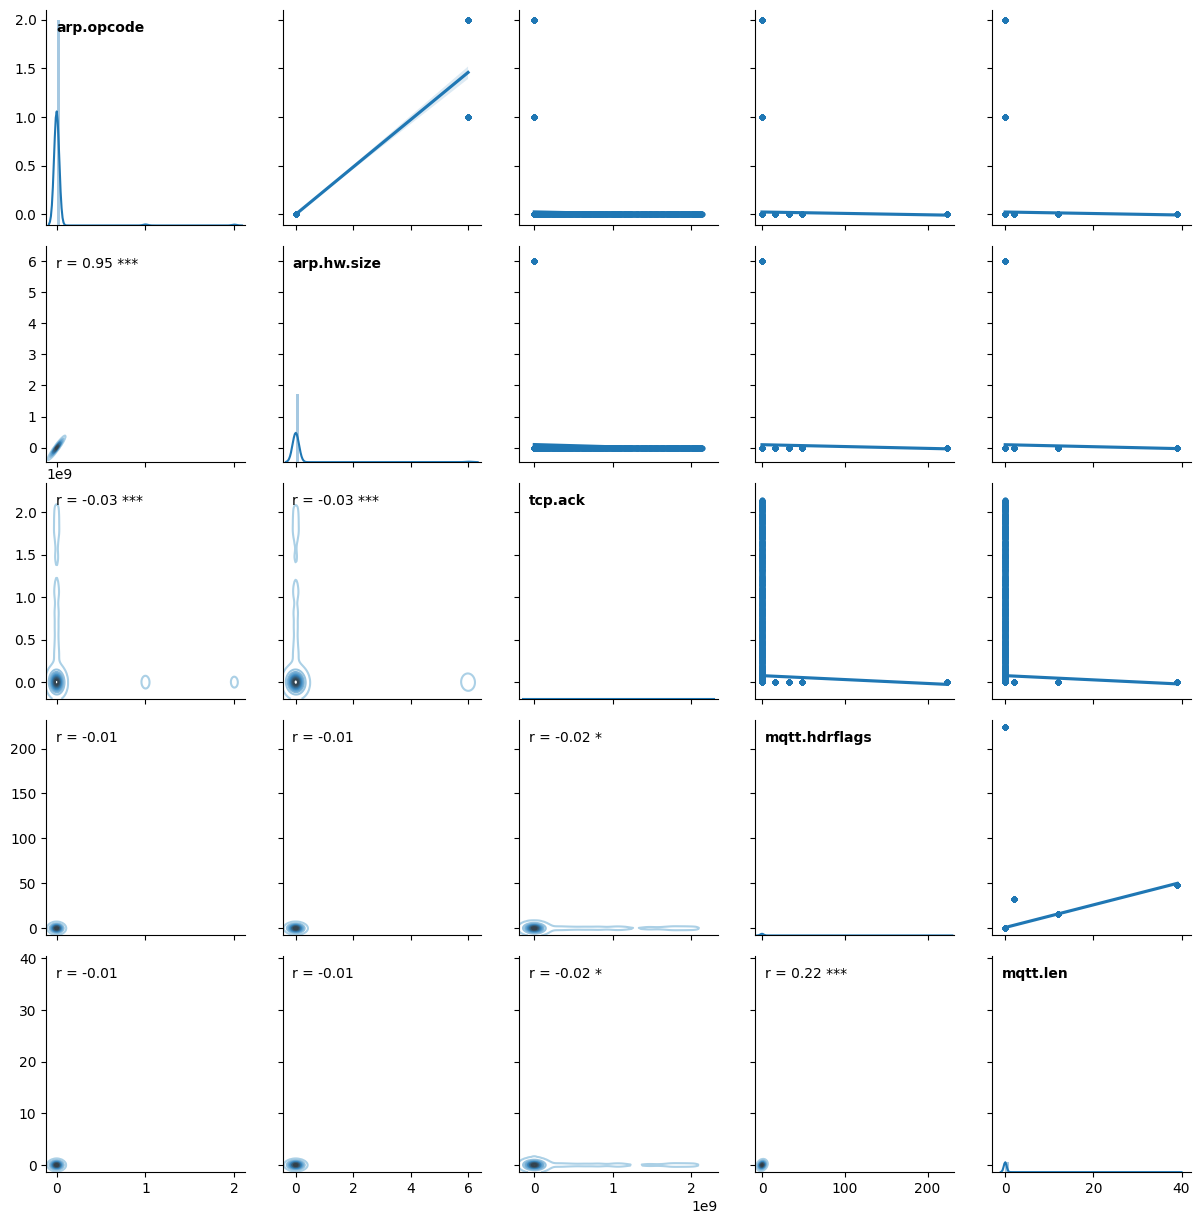

In [14]:
functions.cor_matrix(df[['arp.opcode','arp.hw.size','tcp.ack','mqtt.hdrflags','mqtt.len']])

In [15]:
start_time = functions.start_measures()

In [16]:
df.dropna(axis=0, how='any', inplace=True)
df.drop_duplicates(subset=None, keep="first", inplace=True)
df = shuffle(df)

categorical_columns = []
for col in df.columns[df.dtypes == object]:
    if col != "Attack_type":
        categorical_columns.append(col)

featuresFromStart = [ col for col in df.columns if col not in ["Attack_label"]+["Attack_type"]]

colunas_one_hot = {}
for coluna in categorical_columns:
    codes, uniques = pd.factorize(df[coluna].unique())
    colunas_one_hot[coluna] = {"uniques": uniques, "codes":codes}
    df[coluna] = df[coluna].replace(colunas_one_hot[coluna]["uniques"], colunas_one_hot[coluna]["codes"])
    print(coluna)
df = pd.get_dummies(data=df, columns=categorical_columns)


http.request.method
http.referer
http.request.version
dns.qry.name.len
mqtt.conack.flags
mqtt.protoname
mqtt.topic


In [17]:

features = [ col for col in df.columns if col not in ["Attack_label"]+["Attack_type"]]
n_total = len(df)
le = LabelEncoder()
le.fit(df["Attack_type"].values)

train_val_indices, test_indices = train_test_split(range(n_total), test_size=0.2, random_state=random_state)

X_train = df[features].values[train_val_indices]
y_train = df["Attack_type"].values[train_val_indices]
y_train = le.transform(y_train)

X_test = df[features].values[test_indices]
y_test = df["Attack_type"].values[test_indices]
y_test = le.transform(y_test)

standScaler = StandardScaler()
model_norm = standScaler.fit(X_train)

X_train = model_norm.transform(X_train)
X_test = model_norm.transform(X_test)
#X_valid = model_norm.transform(X_valid)

In [18]:
clf = tree.DecisionTreeClassifier(max_depth=20, random_state = random_state)#,n_estimators = 10)
# Train the model on training data
clf.fit(X_train, y_train)

predictions = clf.predict(X_test)

In [19]:
df.isnull().sum().sum()

0

In [20]:
functions.calculate_metrics("Decision tree", y_test, predictions, average='weighted')

--- Performance of Decision tree ---
Accuracy : 91.69%
Precision: 91.98%
Recall: 91.69%
F1-score: 91.7%
Balanced accuracy: 92.19%
Classification report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       192
           1       0.87      0.92      0.89       181
           2       1.00      0.99      1.00       192
           3       1.00      1.00      1.00       217
           4       1.00      1.00      1.00       187
           5       0.92      0.80      0.85       207
           6       1.00      1.00      1.00        70
           7       1.00      1.00      1.00       185
           8       0.77      0.78      0.78       204
           9       0.82      0.98      0.89       164
          10       0.95      0.94      0.94       206
          11       0.90      0.78      0.83       203
          12       0.75      0.84      0.79       180
          13       0.95      0.92      0.94       199
          14       0.95      0.92   

In [21]:
#mblib.monitor_usage()

In [22]:
functions.stop_measures(start_time)

(current, peak) (13263589, 23863526)
--- 0.5991568565368652 segundos ---


In [23]:
functions.save_model(clf,"decision_tree")

clf = functions.load_model("decision_tree")

predictions = clf.predict(X_test)